# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama:** Naufal Rafly Wanhar
- **Email:** mc006d5y1410@student.devacademy.id
- **ID Dicoding:** MC006D5Y1410

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren pendapatan perusahaan sepanjang periode?
2. Kategori produk apa yang memiliki tingkat penjualan tertinggi dan terendah?
3. Bagaimana karakteristik dan segmentasi pelanggan perusahaan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Memuat tabel customers
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Memuat tabel geolocation
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
# Memuat tabel order items
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# Memuat tabel order payments
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
# Memuat tabel order reviews
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
# Memuat tabel orders
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# Memuat tabel product category name
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
# Memuat tabel products
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
# Memuat tabel sellers
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset yang digunakan terdiri dari beberapa tabel yang berkaitan dengan pelanggan, pesanan, produk, dan lainnya.
- Semua dataset berhasil dimuat tanpa error, menunjukkan bahwa file tersedia dan dapat dibaca dengan baik.
- Struktur awal dari dataset menunjukkan adanya kolom-kolom penting yang akan digunakan dalam analisis, seperti order_id, customer_id, price, dll.

### Assessing Data

1. Menilai data customers_df

1.1 Memeriksa tipe data dan missing value

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


1.2 Menampilkan missing value

In [15]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

1.3 Memeriksa duplikasi data

In [16]:
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  0


1.4 Memeriksa parameter statistik

In [17]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value.
- Tidak ada keanehan nilai pada customers_df

2. Menilai data geolocation_df

 2.1 Memeriksa tipe data dan missing value

In [18]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


2.2 Menampilkan missing value

In [19]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

2.3 Memeriksa duplikasi data

In [20]:
print("Jumlah Duplikasi: ", geolocation_df.duplicated().sum())

Jumlah Duplikasi:  261831


2.4 Memeriksa parameter statistik

In [21]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value.
- Terdapat banyak duplikasi data
- Tidak ada keanehan nilai pada geolocation_df

3. Menilai data order_items_df

3.1 Memeriksa tipe data dan missing value

In [22]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


3.2 Menampilkan missing value

In [23]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

3.3 Memeriksa duplikasi data

In [24]:
print("Jumlah Duplikasi: ", order_items_df.duplicated().sum())

Jumlah Duplikasi:  0


3.4 Memeriksa parameter statistik

In [25]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Terdapat kesalahan tipe data pada shipping_limit_date yang harusnya datetime.
- Tidak terdapat missing value.
- Tidak ada keanehan nilai pada order_items_df

4. Menilai data order_payments_df

4.1 Memeriksa tipe data dan missing value

In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


4.2 Menampilkan missing value

In [27]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

4.3 Memeriksa duplikasi data

In [28]:
print("Jumlah Duplikasi: ", order_payments_df.duplicated().sum())

Jumlah Duplikasi:  0


4.4 Memeriksa parameter statistik

In [29]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value.
- Tidak ada keanehan nilai pada order_payments_df

5. Menilai data order_reviews_df

5.1 Memeriksa tipe data dan missing value

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


5.2 Menampilkan missing value

In [31]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

5.3 Memeriksa duplikasi data

In [32]:
print("Jumlah Duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah Duplikasi:  0


5.4 Memeriksa parameter statistik

In [33]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp.
- Terdapat missing value pada kolom review_comment_title dan review_comment_message.
- Tidak ada keanehan nilai pada order_reviews_df

6. Menilai data orders_df

6.1 Memeriksa tipe data dan missing value

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


6.2 Menampilkan missing value

In [35]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

6.3 Memeriksa duplikasi data

In [36]:
print("Jumlah Duplikasi: ", orders_df.duplicated().sum())

Jumlah Duplikasi:  0


6.4 Memeriksa parameter statistik

In [37]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.
- Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.
- Tidak ada keanehan nilai pada orders_df

7. Menilai data product_category_name_translation_df

7.1 Memeriksa tipe data dan missing value

In [38]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


7.2 Menampilkan missing value

In [39]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

7.3 Memeriksa duplikasi data

In [40]:
print("Jumlah Duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah Duplikasi:  0


7.4 Memeriksa parameter statistik

In [41]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak etrdapat kesalahan tipe data.
- Tidak terdapat missing value.
- Tidak ada keanehan nilai pada product_category_name_translation_df

8. Menilai data products_df

8.1 Memeriksa tipe data dan missing value

In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


8.2 Menampilkan missing value

In [43]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

8.3 Memeriksa duplikasi data

In [44]:
print("Jumlah Duplikasi: ", products_df.duplicated().sum())

Jumlah Duplikasi:  0


8.4 Memeriksa parameter statistik

In [45]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Tidak terdapat kesalahan tipe data.
- Terdapat missing value pada beberapa kolom.
- Tidak ada keanehan nilai pada products_df

9. Menilai data sellers_df

9.1 Memeriksa tipe data dan missing value

In [46]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


9.2 Menampilkan missing value

In [47]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

9.3 Memeriksa duplikasi data

In [48]:
print("Jumlah Duplikasi: ", sellers_df.duplicated().sum())

Jumlah Duplikasi:  0


9.4 Memeriksa parameter statistik

In [49]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value.
- Tidak ada keanehan nilai pada sellers_df

### Cleaning Data

1. Membersihkan data pada order_items

In [50]:
# Mengubah tipe data pada order_items_df
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight**:
- Kolom shipping_limit_date sudah diubah menjadi format tanggal agar lebih mudah dianalisis.


2. Membersihkan data pada orders_df

In [51]:
# Mengubah tipe data pada orders_df
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
    ]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [52]:
# Menampilkan baris yang memiliki nilai NaN pada kolom order_approved_at
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [53]:
# Menampilkan baris yang memiliki nilai NaN pada kolom order_delivered_carrier_date
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [54]:
# Menampilkan baris yang memiliki nilai NaN pada kolom order_delivered_customer_date
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [55]:
# Menghapus seluruh baris yang memiliki nilai NaN pada DataFrame
orders_df.dropna(axis=0, inplace=True)

In [56]:
# Menampilkan jumlah nilai NaN yang tersisa di setiap kolom setelah proses penghapusan
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight**:
- Beberapa pesanan tidak memiliki tanggal persetujuan (order_approved_at), yang kemungkinan besar berarti pesanan tersebut dibatalkan atau tidak pernah disetujui.
- Ada juga pesanan yang tidak memiliki tanggal pengiriman (order_delivered_carrier_date dan order_delivered_customer_date), yang bisa berarti pesanan tidak sampai ke pelanggan atau ada masalah dalam proses pengiriman.
- Semua pesanan dengan data yang tidak lengkap sudah dihapus agar analisis lebih akurat dan fokus pada pesanan yang benar-benar selesai.

3. Membersihkan data pada products_df

In [57]:
# Mengisi nilai NaN pada kolom product_category_name dengan nilai "Unknown"
products_df.product_category_name.fillna(value="Unknown", inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\3671375145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value="Unknown", inplace=True)


In [58]:
# Menampilkan ringkasan statistik deskriptif dari products_df setelah pengisian nilai NaN
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [59]:
# Mengubah daftar kolom yang memiliki kemungkinan nilai yang hilang dan perlu diisi dengan median
missing_columns = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in missing_columns:
    products_df[col].fillna(value=products_df[col].median(), inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\3794738045.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[col].fillna(value=products_df[col].median(), inplace=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\3794738045.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [60]:
# Menampilkan jumlah nilai NaN yang tersisa di setiap kolom setelah proses pengisian
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Kolom product_category_name yang kosong sudah diisi dengan "Unknown" supaya data tetap bisa digunakan dalam analisis.
- Beberapa kolom seperti product_name_length, product_description_length, dan product_photos_qty sebelumnya memiliki data yang hilang, yang bisa jadi menunjukkan bahwa beberapa produk tidak memiliki deskripsi atau foto yang cukup.
- Data yang hilang pada kolom seperti berat (product_weight_g), panjang (product_length_cm), tinggi (product_height_cm), dan lebar (product_width_cm) sudah diisi dengan nilai median agar tidak ada data yang kosong tanpa harus menghapus produk tersebut.

## Exploratory Data Analysis (EDA)

### Explore data customers_df

In [61]:
# Melihat statistik deskriptif dari dataset pelanggan
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [62]:
# Mengelompokkan pelanggan berdasarkan kota dan menghitung jumlah pelanggan unik di setiap kota
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [63]:
# Mengelompokkan pelanggan berdasarkan provinsi dan menghitung jumlah pelanggan unik di setiap provinsi
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight**
- Dari eksplorasi data pelanggan ini, dapat mengetahui daerah dengan potensi pelanggan terbesar dan memahami bagaimana perusahaan bisa menyesuaikan strategi pemasaran serta logistik untuk meningkatkan pengalaman belanja mereka.









### Explore data orders_df

In [64]:
# Menampilkan 5 baris pertama dari dataset orders_df
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [65]:
# Menghitung waktu dari pesanan disetujui hingga sampai ke pelanggan
delivery_lead_time = orders_df["order_delivered_customer_date"] - orders_df["order_approved_at"]
delivery_lead_time = delivery_lead_time.apply(lambda x: x.total_seconds())
orders_df["delivery_lead_time (days)"] = round(delivery_lead_time/86400)

# Menampilkan 5 baris pertama setelah menambahkan kolom baru
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [66]:
# Menghitung waktu sejak pesanan tiba di kurir hingga diterima oleh pelanggan
carrier_to_customer_duration = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
carrier_to_customer_duration = carrier_to_customer_duration.apply(lambda x: x.total_seconds())
orders_df["carrier_to_customer_duration (days)"] = round(carrier_to_customer_duration/86400)

# Menampilkan 5 baris pertama setelah menambahkan kolom baru
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days),carrier_to_customer_duration (days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2.0


In [67]:
# Menghitung selisih antara total waktu pengiriman dan waktu dari kurir ke pelanggan
order_processing_time = orders_df["delivery_lead_time (days)"] - orders_df["carrier_to_customer_duration (days)"]
orders_df["order_processing_time (days)"] = order_processing_time

# Menampilkan 5 baris pertama setelah menambahkan kolom baru
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days),carrier_to_customer_duration (days),order_processing_time (days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,9.0,4.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2.0,1.0


In [68]:
# Menampilkan statistik deskriptif dataset orders_df
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days),carrier_to_customer_duration (days),order_processing_time (days)
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000,96461.000000,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.119478,9.292429,2.827049
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-7.000000,-16.000000,-171.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,6.000000,4.000000,1.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000,7.000000,2.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,15.000000,12.000000,4.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000,205.000000,126.000000


In [69]:
# Mengelompokkan pesanan berdasarkan status dan menghitung jumlah pesanan unik untuk setiap status
orders_df.groupby(by="order_status")["order_id"].nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96455
1,canceled,6


**Insight**
- Dari eksplorasi data pesanan ini,  dapat memahami proses pemesanan, waktu pengiriman, serta kendala yang mungkin terjadi dalam pemrosesan pesanan. Analisis ini berguna untuk meningkatkan efisiensi operasional dan meningkatkan kepuasan pelanggan.

### Explore data orders_df dan customers_df

In [70]:
#
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days),carrier_to_customer_duration (days),order_processing_time (days),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,9.0,4.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2.0,1.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


- Jumlah order berdasarkan kota

In [71]:
#
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


- Jumlah order berdasarkan state

In [72]:
#
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


- Jumlah order berdasarkan kode pos

In [73]:
#
orders_customers_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_zip_code_prefix,order_id
0,22790,136
1,24230,117
2,22793,116
3,24220,115
4,22775,103
5,29101,100
6,13212,92
7,35162,92
8,38400,85
9,22631,85


**Insight**
-

### Explore data orders_df, customers_df, dan order_payments_df

In [74]:
# Menggabungkan data orders_df dan customers_df berdasarkan customer_id
orders_customers_payments_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan 5 baris pertama dari dataset hasil gabungan
orders_customers_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days),carrier_to_customer_duration (days),order_processing_time (days),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [75]:
# Menghitung jumlah order unik berdasarkan kota dan mengurutkan dari yang terbanyak
orders_customers_payments_df.groupby(by="customer_city")["payment_value"].sum().sort_values(ascending=False).reset_index().head(10)

,customer_city,payment_value
0,sao paulo,2108073.49
1,rio de janeiro,1112156.04
2,belo horizonte,406050.87
3,brasilia,345221.87
4,curitiba,238582.26
5,porto alegre,214667.83
6,campinas,209028.97
7,salvador,207790.89
8,guarulhos,157629.92
9,niteroi,135458.19


In [76]:
# Menghitung jumlah order unik berdasarkan provinsi dan mengurutkan dari yang terbanyak
orders_customers_payments_df.groupby(by="customer_state")["payment_value"].sum().sort_values(ascending=False).reset_index().head(10)

,customer_state,payment_value
0,SP,5768355.09
1,RJ,2055878.41
2,MG,1819029.99
3,RS,861054.35
4,PR,781919.55
5,SC,595361.91
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


In [77]:
# Menghitung jumlah order unik berdasarkan kode pos dan mengurutkan dari yang terbanyak
orders_customers_payments_df.groupby(by="customer_zip_code_prefix")["payment_value"].sum().sort_values(ascending=False).reset_index().head(10)

,customer_zip_code_prefix,payment_value
0,22790,24846.11
1,24220,19985.04
2,24230,19902.89
3,22775,19076.06
4,35501,18918.44
5,22793,18855.85
6,28970,18836.77
7,13212,17840.88
8,36570,17798.69
9,22631,17691.55


In [78]:
# Menghitung total nilai pembayaran berdasarkan metode pembayaran
orders_customers_payments_df.groupby(by="payment_type")["payment_value"].sum().sort_values(ascending=False).reset_index()

,payment_type,payment_value
0,credit_card,12100624.80
1,boleto,2767977.98
2,voucher,343013.19
3,debit_card,208066.88


In [79]:
# Menghitung jumlah order unik berdasarkan metode pembayaran
orders_customers_payments_df.groupby(by="payment_type")["order_id"].sum().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,voucher,e481f51cbdc54678b7cc49136f2d6af7e481f51cbdc546...
1,credit_card,e481f51cbdc54678b7cc49136f2d6af747770eb9100c2d...
2,debit_card,d22e9fa5731b9e30e8b27afcdc2f8563fdf128b3630c21...
3,boleto,53cdb2fc8bc7dce0b6741e215027345176c6e866289321...


**Insight**
- Analisis ini memberikan wawasan tentang pola pesanan pelanggan berdasarkan lokasi dan metode pembayaran. Informasi ini berguna bagi bisnis untuk menargetkan strategi pemasaran, meningkatkan layanan logistik, dan mengoptimalkan metode pembayaran yang lebih diminati pelanggan.

### Explore data products_df dan order_items_df

In [80]:
# Menggabungkan dataset products_df dengan product_category_name_translation_df
product_name_df = pd.merge(
    left = products_df,
    right = product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Menampilkan 5 baris pertama dari dataset yang telah digabungkan
product_name_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [81]:
# Menggabungkan order_items_df dengan product_name_df berdasarkan product_id
order_items_products_df = pd.merge(
    left=order_items_df,
    right=product_name_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Menampilkan 5 baris pertama dari dataset yang telah digabungkan
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [82]:
# Mengurutkan produk berdasarkan harga tertinggi
order_items_products_df.sort_values(by="price", ascending=False).head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances


In [83]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk unik serta harga minimum dan maksimum
order_items_products_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "price":  ["min", "max"]
})

product_id  price         
                                 nunique    min      max
product_category_name_english                           
agro_industry_and_commerce            74  12.99  2990.00
air_conditioning                     124  10.90  1599.00
art                                   55   3.50  6499.00
arts_and_craftmanship                 19   9.80   289.49
audio                                 58  14.90   598.99
...                                  ...    ...      ...
stationery                           849   2.29  1693.00
tablets_printing_image                 9  14.90   889.99
telephony                           1134   5.00  2428.00
toys                                1411   4.90  1699.99
watches_gifts                       1329   8.99  3999.90

[71 rows x 3 columns]

**Insight**
- Analisis ini membantu memahami tren harga dan jumlah produk dalam berbagai kategori. Informasi ini bisa digunakan untuk strategi penetapan harga, pemilihan produk unggulan, dan analisis persaingan di setiap kategori produk.

### Explore data all_df

In [84]:
# Menggabungkan semua data
all_df = pd.merge(
    left=orders_customers_payments_df,
    right=order_items_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan 5 baris pertama dari dataset yang telah digabungkan
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_lead_time (days),carrier_to_customer_duration (days),...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [85]:
# Mengelompokkan data berdasarkan state pelanggan dan kategori produk
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "order_id": "nunique",
    "price": "sum"
})

order_id    price
customer_state product_category_name_english                   
AC             auto                                  4   606.97
               baby                                  3   697.84
               bed_bath_table                        3   567.70
               books_general_interest                2   633.80
               christmas_supplies                    1    69.90
...                                                ...      ...
TO             sports_leisure                       23  5533.32
               stationery                            3   276.80
               telephony                            20  1268.12
               toys                                 12  1864.15
               watches_gifts                        26  4920.89

[1351 rows x 2 columns]

In [86]:
# Mengelompokkan data berdasarkan state pelanggan dan metode pembayaran
all_df.groupby(by=["customer_state", "payment_type"]).agg({
    "order_id": "nunique",
    "price": "sum"
})

order_id      price
customer_state payment_type                     
AC             boleto              16    3236.98
               credit_card         60   12348.20
               debit_card           2     248.99
               voucher              4    1173.29
AL             boleto              64   11099.80
...                               ...        ...
SP             voucher           1515  267070.03
TO             boleto              75   10528.54
               credit_card        191   37339.59
               debit_card           4     644.69
               voucher             12    6519.86

[105 rows x 2 columns]

In [87]:
# Menyimpan dataset lengkap dalam format CSV
all_df.to_csv("all_data.csv", index=False)

**Insight**
- Analisis ini membantu memahami pola belanja pelanggan berdasarkan lokasi dan metode pembayaran yang digunakan. Dengan informasi ini, strategi bisnis bisa lebih terarah, baik dari sisi pemasaran, promosi, maupun pengelolaan produk per wilayah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pendapatan perusahaan sepanjang periode?


C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\1618700087.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_df = all_df.resample('M', on='order_approved_at').agg({


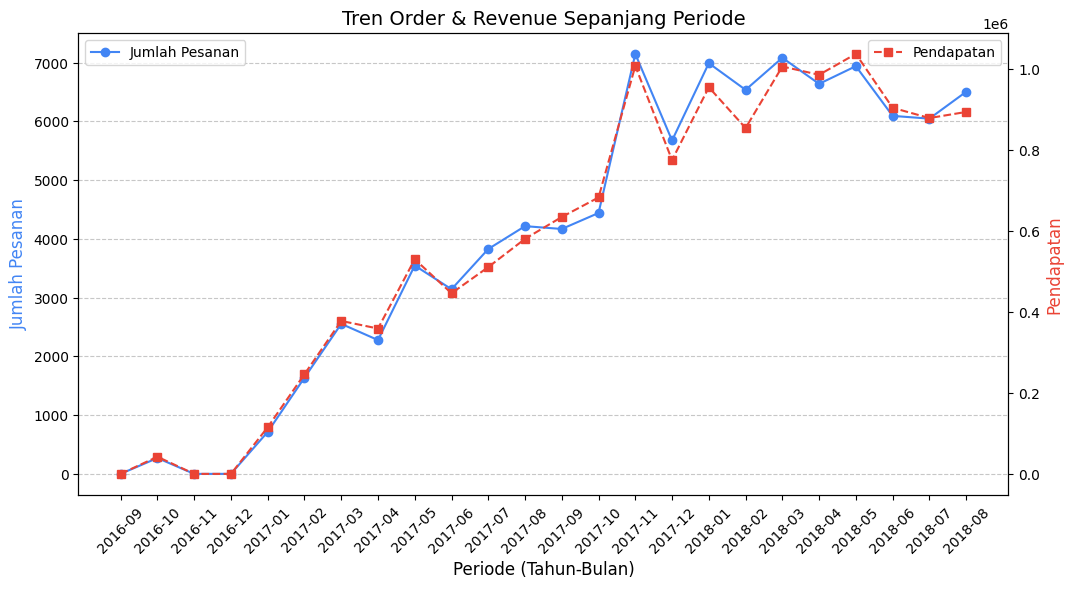

In [88]:
# Mengelompokkan data berdasarkan bulan-tahun untuk melihat tren order dan pendapatan
trend_df = all_df.resample('M', on='order_approved_at').agg({
    "order_id": "nunique",  # Menghitung jumlah pesanan unik setiap bulan
    "price": "sum"  # Menjumlahkan total pendapatan per bulan
}).reset_index()

# Mengubah format tanggal agar lebih mudah dibaca
trend_df["order_approved_at"] = trend_df["order_approved_at"].dt.strftime('%Y-%m')

# Membuat satu figure dengan dua sumbu Y: satu untuk jumlah pesanan, satu untuk pendapatan
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot jumlah pesanan per bulan
ax1.plot(trend_df["order_approved_at"], trend_df["order_id"], marker='o', linestyle='-',
         color="#4285F4", label="Jumlah Pesanan")

# Menambahkan sumbu Y kedua untuk menampilkan tren pendapatan
ax2 = ax1.twinx()
ax2.plot(trend_df["order_approved_at"], trend_df["price"], marker='s', linestyle='--',
         color="#EA4335", label="Pendapatan")

# Memberikan label pada sumbu X dan Y agar lebih jelas
ax1.set_xlabel("Periode (Tahun-Bulan)", fontsize=12)
ax1.set_ylabel("Jumlah Pesanan", fontsize=12, color="#4285F4")
ax2.set_ylabel("Pendapatan", fontsize=12, color="#EA4335")

# Menambahkan judul agar lebih informatif
ax1.set_title("Tren Order & Revenue Sepanjang Periode", fontsize=14)

# Memiringkan label sumbu X agar lebih mudah dibaca
ax1.tick_params(axis='x', rotation=45)

# Menambahkan garis grid pada sumbu Y untuk membantu pembacaan data
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan legenda untuk membedakan dua grafik
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

**Insight**
- Dari grafik, kita bisa melihat adanya pola tertentu dalam jumlah pesanan dan pendapatan setiap bulan. Jika terjadi lonjakan di bulan tertentu, kemungkinan itu dipengaruhi oleh musim belanja atau kampanye promosi.
- Umumnya, ketika jumlah pesanan meningkat, pendapatan juga ikut naik. Namun, jika ada momen di mana pendapatan meningkat tanpa kenaikan pesanan yang signifikan, kemungkinan pelanggan membeli produk dengan harga lebih tinggi.

### Pertanyaan 2: Kategori produk apa yang memiliki tingkat penjualan tertinggi dan terendah?



📈 Kategori dengan penjualan tertinggi: bed_bath_table (9271 pesanan, Revenue: $1,077,834.14)
📉 Kategori dengan penjualan terendah: security_and_services (2 pesanan, Revenue: $283.29)


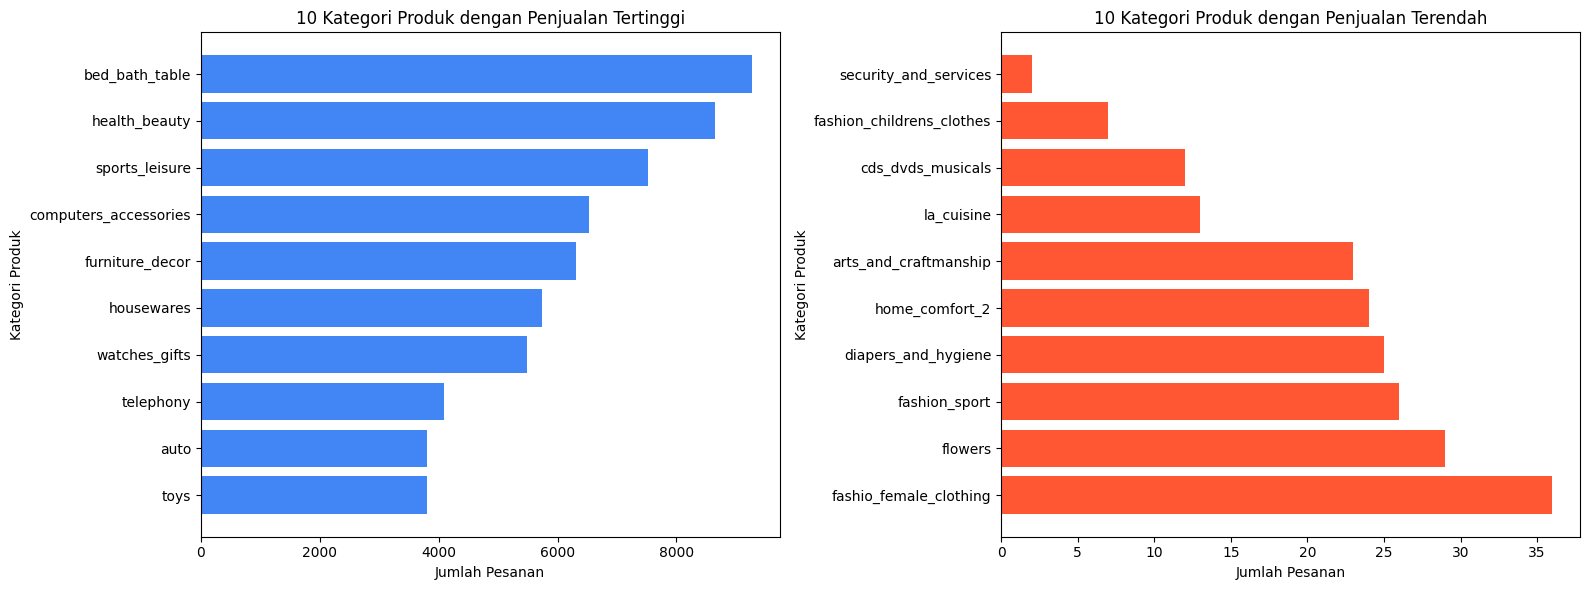

In [89]:
# Mengelompokkan data berdasarkan kategori produk untuk melihat jumlah pesanan dan total pendapatan
category_sales = all_df.groupby("product_category_name_english").agg({
    "order_id": "nunique",  # Menghitung jumlah pesanan unik per kategori
    "price": "sum"  # Menghitung total pendapatan per kategori
}).reset_index()

# Mengubah nama kolom agar lebih jelas
category_sales.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

# Mengurutkan kategori berdasarkan jumlah pesanan dari yang tertinggi ke terendah
category_sales_sorted = category_sales.sort_values(by="order_count", ascending=False)

# Mengidentifikasi kategori dengan penjualan tertinggi dan terendah
top_category = category_sales_sorted.iloc[0]  # Kategori dengan order terbanyak
bottom_category = category_sales_sorted.iloc[-1]  # Kategori dengan order paling sedikit

# Menampilkan hasil dalam teks
print(f"📈 Kategori dengan penjualan tertinggi: {top_category['product_category_name_english']} "
      f"({top_category['order_count']} pesanan, Revenue: ${top_category['revenue']:,.2f})")

print(f"📉 Kategori dengan penjualan terendah: {bottom_category['product_category_name_english']} "
      f"({bottom_category['order_count']} pesanan, Revenue: ${bottom_category['revenue']:,.2f})")

# Membuat visualisasi dalam satu figure dengan dua grafik
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Grafik 10 kategori dengan penjualan tertinggi
axes[0].barh(category_sales_sorted["product_category_name_english"][:10],
             category_sales_sorted["order_count"][:10],
             color="#4285F4")
axes[0].set_xlabel("Jumlah Pesanan")
axes[0].set_ylabel("Kategori Produk")
axes[0].set_title("10 Kategori Produk dengan Penjualan Tertinggi")
axes[0].invert_yaxis()  # Membalik urutan agar kategori tertinggi berada di atas

# Grafik 10 kategori dengan penjualan terendah
axes[1].barh(category_sales_sorted["product_category_name_english"][-10:],
             category_sales_sorted["order_count"][-10:],
             color="#FF5733")
axes[1].set_xlabel("Jumlah Pesanan")
axes[1].set_ylabel("Kategori Produk")
axes[1].set_title("10 Kategori Produk dengan Penjualan Terendah")

# Menyesuaikan tampilan agar lebih rapi
plt.tight_layout()
plt.show()

**Insight**
- Kategori dengan jumlah pesanan terbanyak menunjukkan produk yang paling diminati oleh pelanggan. Ini bisa menjadi fokus utama dalam strategi pemasaran, penambahan stok, atau pengembangan produk.
- Kategori dengan jumlah pesanan paling sedikit mungkin kurang menarik bagi pelanggan atau memiliki faktor penghambat, seperti harga yang tinggi, kurangnya promosi, atau stok yang terbatas.

### Pertanyaan 3: Bagaimana karakteristik dan segmentasi pelanggan perusahaan?

1. Analisis pelanggan berdasarkan city

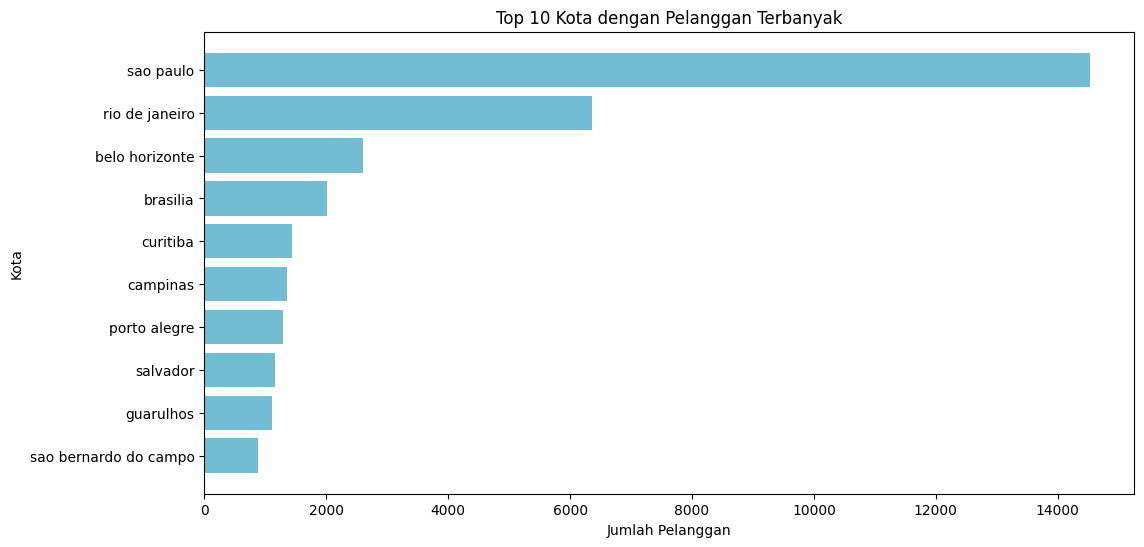

In [90]:
# Mengelompokkan pelanggan berdasarkan kota dan menghitung jumlah pelanggan unik di setiap kota
customer_by_city = all_df.groupby("customer_city").agg({
    "customer_unique_id": "nunique"
}).reset_index()

# Mengubah nama kolom agar lebih jelas
customer_by_city.rename(columns={"customer_unique_id": "customer_count"}, inplace=True)

# Mengambil 10 kota dengan jumlah pelanggan terbanyak
top_cities = customer_by_city.sort_values(by="customer_count", ascending=False).head(10)

# Membuat visualisasi dalam bentuk bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_cities["customer_city"], top_cities["customer_count"], color="#72BCD4")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("Top 10 Kota dengan Pelanggan Terbanyak")
plt.gca().invert_yaxis()  # Membalik urutan agar kota dengan pelanggan terbanyak berada di atas
plt.show()

**Insight**
- Kota dengan jumlah pelanggan terbanyak menunjukkan area dengan demand tinggi.
- Bisa menjadi target utama untuk promosi dan ekspansi bisnis.
- Kota dengan pelanggan sedikit bisa dieksplorasi lebih lanjut untuk potensi peningkatan melalui strategi pemasaran yang lebih agresif.

2. Analisis berdasarkan state

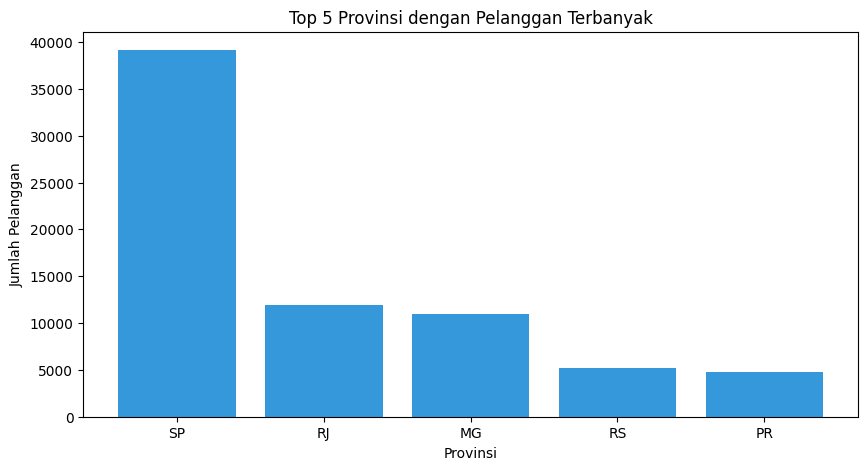

In [91]:
# Mengelompokkan pelanggan berdasarkan provinsi dan menghitung jumlah pelanggan unik di setiap provinsi
customer_by_state = all_df.groupby("customer_state").agg({
    "customer_unique_id": "nunique"
}).reset_index()

# Mengubah nama kolom agar lebih jelas
customer_by_state.rename(columns={"customer_unique_id": "customer_count"}, inplace=True)

# Mengambil 5 provinsi dengan jumlah pelanggan terbanyak
top_states = customer_by_state.sort_values(by="customer_count", ascending=False).head(5)

# Membuat visualisasi dalam bentuk bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_states["customer_state"], top_states["customer_count"], color="#3498DB")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Pelanggan")
plt.title("Top 5 Provinsi dengan Pelanggan Terbanyak")
plt.show()

**Insight**
- Provinsi dengan jumlah pelanggan tinggi menunjukkan wilayah dominan dalam basis pelanggan perusahaan.
- Bisa menjadi pertimbangan utama dalam optimalisasi distribusi logistik dan penyesuaian strategi pemasaran.
- Provinsi dengan pelanggan sedikit bisa dianalisis lebih lanjut apakah ada hambatan, seperti aksesibilitas, preferensi pasar, atau daya beli yang berbeda.

3. Analisis berdasarkan metode pembayaran

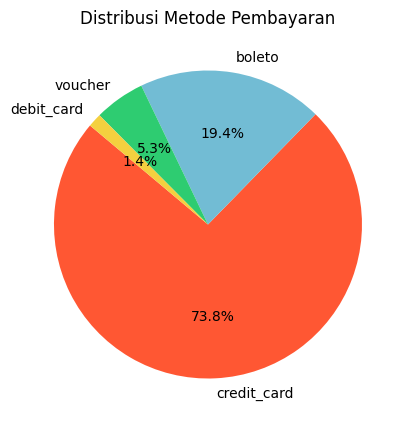

In [92]:
# Menghitung distribusi metode pembayaran yang digunakan pelanggan
payment_distribution = all_df["payment_type"].value_counts()

# Membuat visualisasi dalam bentuk pie chart
plt.figure(figsize=(8, 5))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct="%1.1f%%",
        colors=["#FF5733", "#72BCD4", "#2ECC71", "#F4D03F"], startangle=140)
plt.title("Distribusi Metode Pembayaran")
plt.show()

**Insight:**
- Metode pembayaran yang paling sering digunakan menunjukkan preferensi pelanggan dalam bertransaksi.
- Jika pembayaran digital mendominasi, perusahaan bisa fokus pada pengembangan kemudahan transaksi online.
- Jika pembayaran tunai masih signifikan, perlu dipertimbangkan apakah ada kebutuhan untuk ekspansi metode pembayaran digital guna meningkatkan efisiensi.

## Analisis Lanjutan (RFM Analisis)

Analisis RFM (Recency, Frequency, Monetary) membantu mengelompokkan pelanggan berdasarkan seberapa sering mereka bertransaksi, kapan terakhir mereka melakukan transaksi, dan berapa banyak mereka membelanjakan di platform.

In [93]:
# Mengelompokkan data berdasarkan customer_id
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Mengambil tanggal order terakhir pelanggan
    "order_id": "nunique",  # Menghitung jumlah transaksi (frekuensi belanja)
    "price": "sum"  # Menghitung total revenue dari pelanggan
})

# Mengubah nama kolom agar lebih jelas
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Konversi timestamp menjadi date agar mudah dihitung
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

# Menentukan hari terakhir transaksi dalam dataset
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()

# Menghitung recency (jumlah hari sejak transaksi terakhir)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom tanggal terakhir transaksi karena sudah tidak diperlukan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Menampilkan beberapa sampel data
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\2974725935.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_recency["customer_id"], x=top_recency["recency"], palette="Blues_r", ax=ax[0])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\2974725935.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_frequency["customer_id"], x=top_frequency["frequency"], palette="Greens_r", ax=ax[1])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_27152\2974725935.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_monetary["customer_i

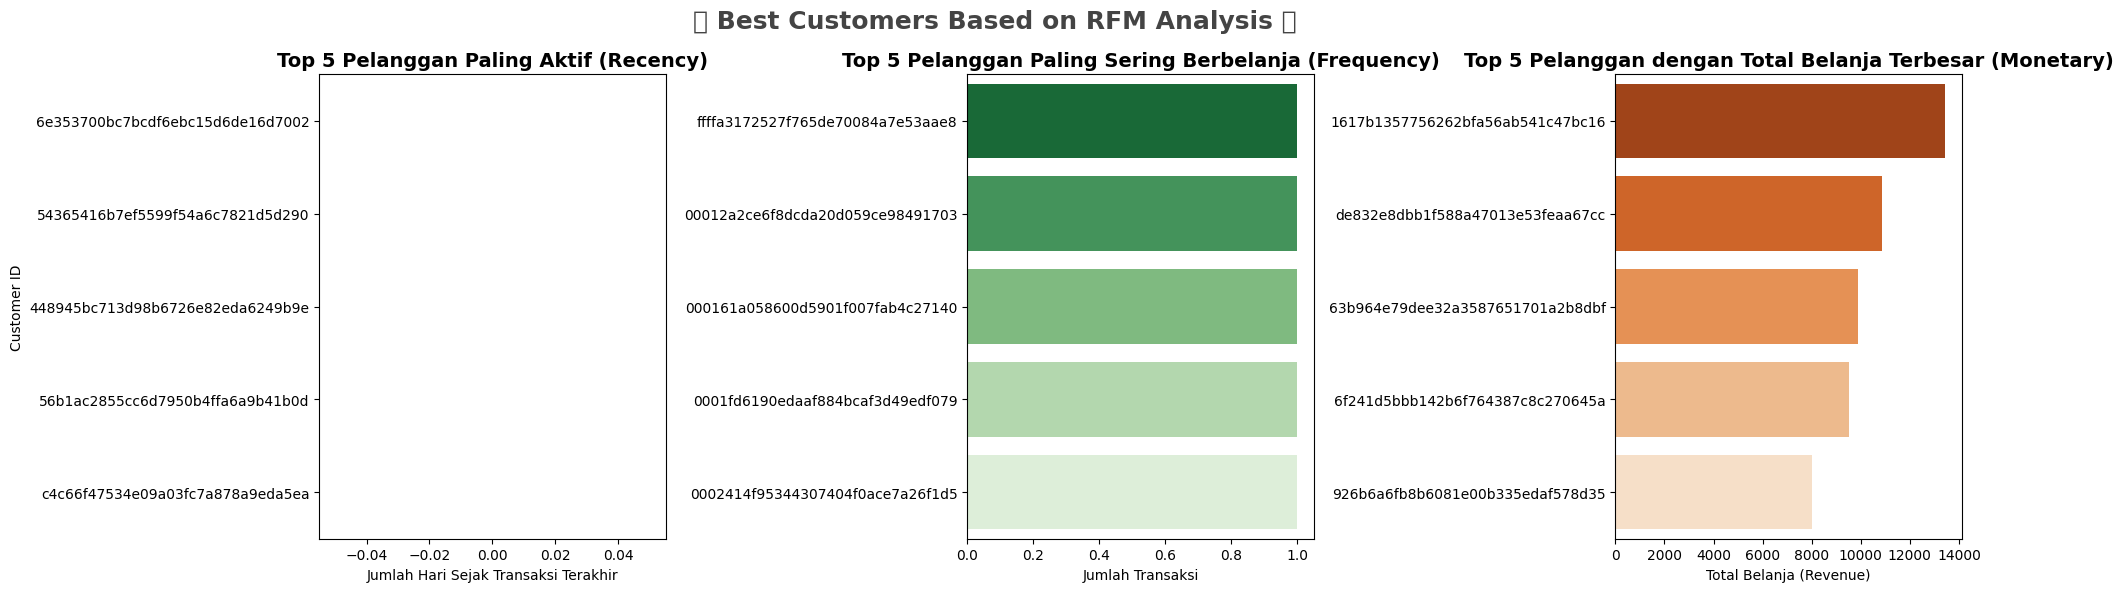

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# **Recency - Pelanggan yang baru saja bertransaksi**
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
sns.barplot(y=top_recency["customer_id"], x=top_recency["recency"], palette="Blues_r", ax=ax[0])
ax[0].set_title("Top 5 Pelanggan Paling Aktif (Recency)", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Jumlah Hari Sejak Transaksi Terakhir")
ax[0].set_ylabel("Customer ID")
ax[0].tick_params(axis="y", labelsize=10)

# **Frequency - Pelanggan yang paling sering belanja**
top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(y=top_frequency["customer_id"], x=top_frequency["frequency"], palette="Greens_r", ax=ax[1])
ax[1].set_title("Top 5 Pelanggan Paling Sering Berbelanja (Frequency)", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Jumlah Transaksi")
ax[1].set_ylabel(None)
ax[1].tick_params(axis="y", labelsize=10)

# **Monetary - Pelanggan dengan total belanja terbesar**
top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(y=top_monetary["customer_id"], x=top_monetary["monetary"], palette="Oranges_r", ax=ax[2])
ax[2].set_title("Top 5 Pelanggan dengan Total Belanja Terbesar (Monetary)", fontsize=14, fontweight="bold")
ax[2].set_xlabel("Total Belanja (Revenue)")
ax[2].set_ylabel(None)
ax[2].tick_params(axis="y", labelsize=10)

plt.suptitle("🔹 Best Customers Based on RFM Analysis 🔹", fontsize=18, fontweight="bold", color="#444")
plt.tight_layout()
plt.show()

**Insight**
- Pelanggan dengan recency rendah adalah pelanggan yang baru saja melakukan pembelian, sehingga kemungkinan besar masih engaged dengan brand.
- Pelanggan dengan frequency tinggi adalah pelanggan setia yang sering berbelanja.
- Pelanggan dengan monetary tinggi merupakan pelanggan premium yang menghasilkan pendapatan besar bagi bisnis.


## Conclusion

1. **Tren Pendapatan Perusahaan Sepanjang Periode**. Dari analisis tren pendapatan dan jumlah pesanan setiap bulan, terlihat adanya pola fluktuatif yang kemungkinan besar dipengaruhi oleh faktor musiman, kampanye promosi, atau hari-hari besar. Lonjakan pesanan yang diikuti dengan peningkatan pendapatan mengindikasikan periode dengan tingkat permintaan yang lebih tinggi. Namun, terdapat beberapa bulan di mana pendapatan meningkat meskipun jumlah pesanan tidak naik secara signifikan. Hal ini menunjukkan bahwa pelanggan cenderung membeli produk dengan harga lebih tinggi pada periode tersebut. Untuk mengoptimalkan strategi bisnis, perusahaan dapat memanfaatkan insight ini dengan merancang promosi yang lebih efektif pada periode dengan permintaan tinggi serta meningkatkan up-selling dan cross-selling pada pelanggan.

2. **Kategori Produk dengan Penjualan Tertinggi dan Terendah**. Kategori produk dengan jumlah pesanan terbanyak mengindikasikan produk yang paling diminati oleh pelanggan. Produk-produk ini bisa menjadi fokus utama dalam pengelolaan stok dan strategi pemasaran. Sebaliknya, kategori dengan penjualan terendah mungkin menghadapi beberapa tantangan, seperti harga yang tidak kompetitif, kurangnya eksposur, atau keterbatasan stok. Dengan memahami preferensi pelanggan, perusahaan dapat mengevaluasi kembali kategori dengan penjualan rendah dan mencari peluang peningkatan melalui rebranding, strategi diskon, atau kampanye pemasaran yang lebih agresif.

3. **Karakteristik dan Segmentasi Pelanggan**. Dari analisis pelanggan berdasarkan kota dan provinsi, terlihat bahwa pelanggan terkonsentrasi pada beberapa wilayah tertentu. Hal ini menunjukkan adanya peluang untuk memperluas pasar di area dengan permintaan tinggi dan meningkatkan penetrasi di daerah dengan jumlah pelanggan rendah. Faktor-faktor seperti infrastruktur logistik, daya beli, dan kebiasaan belanja masyarakat perlu dipertimbangkan untuk menentukan strategi ekspansi yang tepat. Sementara itu, distribusi metode pembayaran menunjukkan preferensi pelanggan dalam bertransaksi. Jika metode pembayaran digital mendominasi, maka penguatan sistem pembayaran online menjadi krusial untuk meningkatkan pengalaman pelanggan. Sebaliknya, jika pembayaran tunai masih memiliki pangsa yang signifikan, perusahaan dapat mempertimbangkan kerja sama dengan platform pembayaran digital untuk memudahkan transaksi pelanggan.

4. **Analisis Recency, Frequency, dan Monetary (RFM)** membantu dalam mengidentifikasi pelanggan yang paling berharga bagi perusahaan. Pelanggan dengan recency rendah adalah mereka yang baru saja bertransaksi dan masih aktif, sehingga strategi retensi seperti program loyalitas dapat diterapkan. Pelanggan dengan frequency tinggi menunjukkan pelanggan setia yang sering melakukan pembelian, sehingga dapat diberikan insentif tambahan agar semakin loyal. Sementara itu, pelanggan dengan monetary tinggi adalah pelanggan premium yang berkontribusi besar terhadap pendapatan perusahaan. Untuk segmen ini, strategi eksklusif seperti program VIP atau layanan prioritas dapat meningkatkan engagement mereka terhadap brand.

**Kesimpulan Akhir**:

Berdasarkan keseluruhan analisis, perusahaan dapat mengambil beberapa langkah strategis untuk meningkatkan performa bisnis, antara lain:
- Memanfaatkan tren musiman untuk mengoptimalkan strategi promosi dan stok.
- Fokus pada kategori produk dengan permintaan tinggi dan mencari cara untuk meningkatkan kategori dengan penjualan rendah.
- Menyesuaikan strategi ekspansi berdasarkan karakteristik pelanggan di berbagai wilayah.
- Mengoptimalkan metode pembayaran untuk memberikan pengalaman belanja yang lebih nyaman bagi pelanggan.
- Memanfaatkan hasil RFM analysis untuk meningkatkan loyalitas pelanggan dan memaksimalkan nilai pelanggan bagi bisnis.